***
<b> <center>
    Machine Learning Project| Windows vs Mac <br>
    A2: Analysis
</b>
    
   <center> Unsupervised Learning Model - Team 13 </center>
  <center>  MSBA2</center>
<center>Alexey Smyvin, Juan Camilo Salazar, Raquel Calhao, Shaiffali Sagar</center>
<center>Hult International Business School</center>   

   
***

# Mac vs Windows?
<br>Aim: To analyze and interpret an unsupervised learning problem based on survey data for Apple.</br>

Consumer behavior is a complex phenomenon that is evolving according to the time, situations, demographic characteristics of individuals, personality traits, and cultural influences. The personality of individuals is a unique dynamic organization of the characteristics of a particular person, physical and psychological, which influence behavior and responses to the social and physical environment. It gives the impression that consumer buying is always influenced by their personality.

Countless consumers have pondered this question when preparing to buy a new computer. As a result, Apple has been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. Recently, Apple has decided to approach this question from the perspective of the Big Five personality traits and the Hult DNA to identify consumer buying behavior.

# Analysis
In this analysis, we will be looking into 137 survey responders that answered 78 questions. We will be separating the types of questions into their Big Five personality traits. We will also separate the Hult DNA questions into 3 groups based on information provided in the Hult Handbook. Using this information we will explore the data and determine if there are any overarching insights prior to diving deeper into the analysis.

After exploration, we will organize our data and utilize unsupervised machine learning techniques - PCAs and Clustering to determine the types of customer that would purchase either a Macbook or Windows computer. Our goal is to help Apple determine unique customers that can be isolated and find out which customers are more inclined to remain or switch from their current laptop owned.

***Big 5 Personality Traits***

**Extroversion (E)** is the personality trait of seeking fulfillment from sources outside the self or in community. High scorers tend to be very social while low scorers prefer to work on their projects alone. 
**Agreeableness (A)** reflects much individuals adjust their behavior to suit others. High scorers are typically polite and like people. Low scorers tend to 'tell it like it is'. **Conscientiousness (C)** is the personality trait of being honest and hardworking. High scorers tend to follow rules and prefer clean homes. Low scorers may be messy and cheat others. 
**Neuroticism (N)** is the personality trait of being emotional. 
**Openness to Experience (O)** is the personality trait of seeking new experience and intellectual pursuits. High scores may day dream a lot. Low scorers may be very down to earth.

***Hult DNA Personality Traits***

The Hult DNA represents personality and leadership traits that are sought after by employers. The Apple survey questions were defined under the three critical competencies (Thinking | Communicating | Team Building).

Thinking is the trait of being 'self-aware', having the ability to 'embrace change' and being a 'dynamic thinker'. High scorers tend to be innovative people with a hunger for knowledge. Communicating reflects an individual's ability to 'speak and listen skillfully', 'influence confidently' and 'present ideas effectively'. High scorers tend to be confident people who do not shy away from conflict. Team Building reflects the ability to 'build collaborative relationships', 'inspire and motivate' and 'resolve conflict constructively'. High scorers tend to be resilient, collaborative and trusting people .

Basing the concepts, the data were analyzed generating components that had these personality traits.

**code to experience an interactive report**

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('./survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# survey_df.info()

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

# Exploration
To get a better understanding of our data we will conduct some general exploration to observe the types of data we have available from the survey. We will explore specific demographics, and also conduct cleaning or grouping when necessary. The survey consists of 78 questions, split into various categories to determine eventually how we can manage and prepare our data for the PCA model and Clustering.

All questions in the survey have a scale 1 to 5.

## Summary Statistics

In [3]:
# summary of decriptive statistics
survey_df.describe(include = 'number').round(decimals =2)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00,

## Demographic

### Ethnicity

In [4]:
# value counts for ethnicity
print(survey_df['What is your ethnicity?'].value_counts())
print("\n\n")

# value counts for channel
print(survey_df['What is your nationality? '].value_counts())
print("\n\n")

# value counts for channel
print(survey_df['Gender'].value_counts())
print("\n\n")

# value counts for channel
print(survey_df['What is your age?'].value_counts())
print("\n\n")

# value counts for channel
print(survey_df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())

White / Caucasian       38
Far east Asian          29
Hispanic / Latino       25
West Asian / Indian     25
Prefer not to answer     9
African American         8
Middle Eastern           2
Native American          1
Name: What is your ethnicity?, dtype: int64



Indian                  18
China                    8
German                   6
Peruvian                 5
Mexican                  5
Taiwan                   3
Brazilian                3
Colombian                3
Chinese                  3
USA                      3
Russian                  3
Norwegian                3
American                 3
Italian                  2
Nigerian                 2
Brazil                   2
indian                   2
Indonesian               2
Vietnamese               2
Russia                   2
Turkish                  2
Republic of Korea        2
Thai                     2
Panama                   1
Nigeria                  1
Mauritius                1
Canada                   1
ecuador 

In [5]:
survey_df.columns = survey_df.columns.str.replace("[']", "")

## Non-demographic Data

In [6]:
# looping to logarithmically transform non-demographic features
for col in survey_df:
    
    # skipping demographic columns
    if col == 'What is your age?' or col == 'What is your ethnicity?'or col == 'Gender' or col == 'What is your nationality? 'or col == 'surveyID' or col == 'What laptop do you currently have?'or col == 'What laptop would you buy in next assuming if all laptops cost the same?' or col == 'What program are you in?':
        continue
        # logarithmic transformation
    survey_df['log_' + col]  = np.log(survey_df[col])
    

# checking results
survey_df.columns

Index(['surveyID', 'Am the life of the party', 'Feel little concern for others', 'Am always prepared', 'Get stressed out easily', 'Have a rich vocabulary', 'Dont talk a lot', 'Am interested in people', 'Leave my belongings around', 'Am relaxed most of the time',
       ...
       'log_Dont persuasively sell a vision or idea', 'log_Build cooperative relationships', 'log_Work well with people from diverse cultural backgrounds', 'log_Effectively negotiate interests, resources, and roles', 'log_Cant rally people on the team around a common goal', 'log_Translate ideas into plans that are organized and realistic', 'log_Resolve conflicts constructively', 'log_Seek and use feedback from teammates', 'log_Coach teammates for performance and growth', 'log_Drive for results'], dtype='object', length=150)

In [7]:
survey_df.rename({'What laptop do you currently have?': 'Laptop_have', 'What laptop would you buy in next assuming if all laptops cost the same?': 'Laptop_will_buy',
                 'What program are you in?': 'Program_in', 'What is your age?' : 'Age', 'What is your nationality? ': 'Nationality',
                 'What is your ethnicity?': 'Ethnicity'}, axis=1, inplace=True)


In [8]:
# scaling (normalizing) variables before correlation analysis

# dropping demographic and non-logarithmic features
survey_personality = survey_df.drop(['surveyID', 'Am the life of the party', 'Feel little concern for others',
                                     'Am always prepared', 'Get stressed out easily', 'Have a rich vocabulary',
                                     'Dont talk a lot', 'Am interested in people', 'Leave my belongings around', 
                                     'Am relaxed most of the time', 'Have difficulty understanding abstract ideas', 
                                     'Feel comfortable around people', 'Insult people', 'Pay attention to details', 
                                     'Worry about things', 'Have a vivid imagination', 'Keep in the background', 
                                     'Sympathize with others feelings', 'Make a mess of things', 'Seldom feel blue', 
                                     'Am not interested in abstract ideas', 'Start conversations', 
                                     'Am not interested in other peoples problems', 'Get chores done right away', 
                                     'Am easily disturbed', 'Have excellent ideas', 'Have little to say', 
                                     'Have a soft heart', 'Often forget to put things back in their proper place',
                                     'Get upset easily', 'Do not have a good imagination', 
                                     'Talk to a lot of different people at parties', 
                                     'Am not really interested in others', 'Like order',
                                     'Change my mood a lot', 'Am quick to understand things',
                                     'Dont like to draw attention to myself', 'Take time out for others',
                                     'Shirk my duties', 'Have frequent mood swings', 'Use difficult words', 
                                     'Dont mind being the center of attention', 'Feel others emotions', 
                                     'Follow a schedule', 'Get irritated easily', 'Spend time reflecting on things',
                                     'Am quiet around strangers', 'Make people feel at ease', 'Am exacting in my work',
                                     'Often feel blue', 'Am full of ideas',
                                     'See underlying patterns in complex situations', 
                                     'Dont  generate ideas that are new and different', 
                                     'Demonstrate an awareness of personal strengths and limitations',
                                     'Display a growth mindset', 'Respond effectively to multiple priorities', 
                                     'Take initiative even when circumstances, objectives, or rules arent clear', 
                                     'Encourage direct and open discussions', 
                                     'Respond effectively to multiple priorities.1', 
                                     'Take initiative even when circumstances, objectives, or rules arent clear.1',
                                     'Encourage direct and open discussions.1', 'Listen carefully to others', 
                                     'Dont persuasively sell a vision or idea', 'Build cooperative relationships', 
                                     'Work well with people from diverse cultural backgrounds', 
                                     'Effectively negotiate interests, resources, and roles', 
                                     'Cant rally people on the team around a common goal', 
                                     'Translate ideas into plans that are organized and realistic', 
                                     'Resolve conflicts constructively', 'Seek and use feedback from teammates', 
                                     'Coach teammates for performance and growth', 'Drive for results', 
                                     'Laptop_have', 
                                     'Laptop_will_buy', 
                                     'Program_in', 'Age', 
                                     'Gender', 'Nationality', 'Ethnicity'],
                                     axis = 1)



# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(survey_personality)
# FITTING the scaler with the data
scaler.fit(survey_personality)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(survey_personality)


# converting scaled data into a DataFrame
personality_scaled = pd.DataFrame(X_scaled)


# reattaching column names
personality_scaled.columns = survey_personality.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_personality), '\n\n')
print(pd.np.var(personality_scaled))


log_Am the life of the party                                                       0.211208
log_Feel little concern for others                                                 0.307969
log_Am always prepared                                                             0.083996
log_Get stressed out easily                                                        0.243294
log_Have a rich vocabulary                                                         0.124063
log_Dont talk a lot                                                                0.179412
log_Am interested in people                                                        0.104628
log_Leave my belongings around                                                     0.356854
log_Am relaxed most of the time                                                    0.154020
log_Have difficulty understanding abstract ideas                                   0.257220
log_Feel comfortable around people                                              

<ipython-input-8-6488be1e315c>:72: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_personality), '\n\n')
<ipython-input-8-6488be1e315c>:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(personality_scaled))


### Visualization

In [9]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)



# FITTING and TRANSFORMING the scaled data
personality_pca = pca.fit_transform(personality_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", personality_scaled.shape)
print("PCA shape     :",  personality_pca.shape)

Original shape: (137, 71)
PCA shape     : (137, 71)


In [10]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")


PC 1 : 0.159
PC 2 : 0.065
PC 3 : 0.06
PC 4 : 0.05
PC 5 : 0.039
PC 6 : 0.037
PC 7 : 0.032
PC 8 : 0.029
PC 9 : 0.026
PC 10 : 0.025
PC 11 : 0.024
PC 12 : 0.023
PC 13 : 0.021
PC 14 : 0.019
PC 15 : 0.018
PC 16 : 0.018
PC 17 : 0.016
PC 18 : 0.016
PC 19 : 0.016
PC 20 : 0.015
PC 21 : 0.014
PC 22 : 0.013
PC 23 : 0.013
PC 24 : 0.013
PC 25 : 0.012
PC 26 : 0.011
PC 27 : 0.011
PC 28 : 0.011
PC 29 : 0.01
PC 30 : 0.01
PC 31 : 0.009
PC 32 : 0.009
PC 33 : 0.009
PC 34 : 0.008
PC 35 : 0.008
PC 36 : 0.008
PC 37 : 0.007
PC 38 : 0.007
PC 39 : 0.007
PC 40 : 0.007
PC 41 : 0.006
PC 42 : 0.006
PC 43 : 0.006
PC 44 : 0.006
PC 45 : 0.005
PC 46 : 0.005
PC 47 : 0.005
PC 48 : 0.004
PC 49 : 0.004
PC 50 : 0.004
PC 51 : 0.004
PC 52 : 0.003
PC 53 : 0.003
PC 54 : 0.003
PC 55 : 0.003
PC 56 : 0.003
PC 57 : 0.002
PC 58 : 0.002
PC 59 : 0.002
PC 60 : 0.002
PC 61 : 0.002
PC 62 : 0.002
PC 63 : 0.002
PC 64 : 0.001
PC 65 : 0.001
PC 66 : 0.001
PC 67 : 0.001
PC 68 : 0.001
PC 69 : 0.001
PC 70 : 0.001
PC 71 : 0.0


In [11]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

1.0


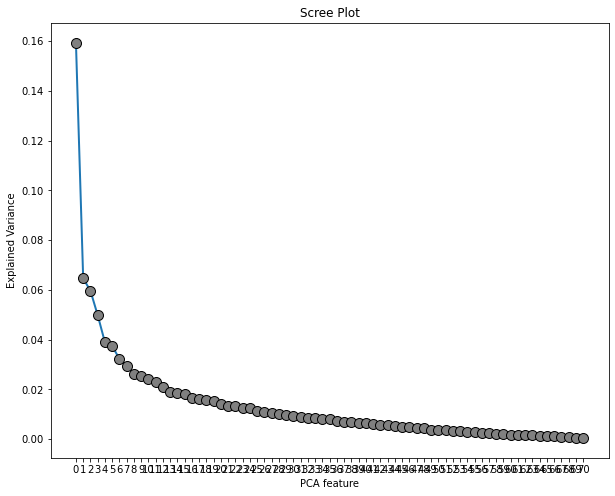

In [12]:
# calling the scree_plot function
scree_plot(pca_object = pca)

***The PC chosen by the team was PC11 which shows lower variance.***

In [13]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(personality_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel('personality_factor_loadings.xlsx')

                                                                                       0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70
log_Am the life of the party                                                    -0.026990  0.213926  0.164310 -0.175846 -0.071086  0.061599 -0.035910  0.012057  0.037605 -0.037693 -0.152379  0.161573 -0.238720 

<ipython-input-13-053b1fef2731>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


In [14]:
factor_loadings_df = factor_loadings_df.drop(factor_loadings_df.columns[11:71], axis=1)

# Cluster identification

## PCA component interpretation

**Introvert :**  very low in Extraversion and very low in Open to Experince. This type can solve multiple tasks, feel uncomfortable being in the center of attention. 

**Neurotic_Extroverts :**  very high in Extraversion and Neuroticism. This type experience stress and emotionally unstable. It is difficult for them to focus on one task. They are workaholics but not very efficient. 

**Extroverts :**  very high in Extraversion, Openess to Experience, and Agreeableness. Very positive people, feel comfortable being around people. At the same time, they are open to new ideas and can solve multiple tasks. 

**Openess_Analytical :**  Idea generator. Extremely low in Agreeableness. This type of people thinks that they are always right, don’t care about other opinions, but very open to new ideas, and can solve very sophisticated tasks.
 
**Extrovert_Openess_Creativity :**  high in Extraversion and very high in Openess to Experience. Very creative people, always use imagination. At the same time, they are extroverts. 

**No_Neuroticism :**  Very high in Extraversion and Agreeableness but low in Conscientiousness.  Very relax and calm people. Don’t care about others but polite at the same time. Emotionally very stable, but can not solve difficult tasks.

**Polite_NarrowMind :**  High in Agreeableness but very low in Openess to Experience. Very polite people, like attention, but hardly ready for hardworking and can not provide deep knowledge.

**Scientist :**  Very high in Conscientiousness.  Always following the rules. Can solve difficult tasks, can generate ideas. Perfectionists.  

**Agreeableness :**  Very high in Agreeableness but low in Conscientiousness. Encourage and motivate other people, polite but don’t care about other opinions. Always driven by the final result. 

**Careless :**  Low: Extraversion, Openness to Experience, and Agreeableness.  Don’t use difficult vocabulary, are not willing to solve difficult tasks, can not demonstrate an open mindset. 

**Narcisist :**  High in Neuroticism and Extraversion. Not ready to accept mistakes, always need people's attention but don’t care about other people's opinions. 

In [15]:
factor_loadings_df

,0,1,2,3,4,5,6,7,8,9,10
log_Am the life of the party,-0.026990,0.213926,0.164310,-0.175846,-0.071086,0.061599,-0.035910,0.012057,0.037605,-0.037693,-0.152379
log_Feel little concern for others,0.111158,0.056557,0.050102,0.052290,0.145858,0.056787,0.025669,-0.135835,-0.057865,0.145188,-0.213918
log_Am always prepared,-0.084723,-0.007801,0.077692,0.138729,-0.067269,0.068194,-0.184492,-0.061707,-0.133266,-0.085045,-0.141395
log_Get stressed out easily,0.015540,0.242299,-0.137371,0.015783,-0.191016,-0.143299,0.116483,0.165887,-0.026023,-0.007592,0.117956
log_Have a rich vocabulary,-0.103624,-0.002209,0.090775,0.092898,0.023530,-0.053353,-0.217567,0.174131,0.169891,-0.041275,-0.089133
log_Dont talk a lot,0.073508,-0.073814,-0.188496,0.094418,0.111869,0.214554,0.094580,-0.053380,-0.018579,-0.140415,-0.000984
log_Am interested in people,-0.076289,0.010336,-0.023593,-0.268754,0.083217,-0.070204,-0.026275,0.199330,-0.157537,-0.026213,-0.117855
log_Leave my belongings around,0.087696,0.106441,0.026284,-0.137582,0.229479,0.110096,0.015366,0.089710,-0.354291,-0.124315,-0.018385
log_Am relaxed most of the time,-0.003900,-0.091297,0.074778,-0.063305,0.200580,0.232863,-0.166615,0.029620,-0.071366,0.074184,-0.144110
log_Have difficulty understanding abstract ideas,0.089367,0.084104,-0.097807,-0.203409,-0.242445,0.059845,0.073928,-0.073260,0.066255,-0.006222,-0.091275


In [16]:
########################### Naming columns ###################

# naming each principal component
factor_loadings_df.columns = ['Introvert',                 
                              'Neurotic_Extroverts',          
                              'Extroverts', 
                              'Openess_Analytical',           
                              'Extrovert_Openess_Creativity',                     
                              'No_Neuroticism',
                              'Polite_NarrowMind',
                              'Scientist',
                              'Agreeableness',
                              'Careless',
                              'Narcisist']         

# checking the result
factor_loadings_df


,Introvert,Neurotic_Extroverts,Extroverts,Openess_Analytical,Extrovert_Openess_Creativity,No_Neuroticism,Polite_NarrowMind,Scientist,Agreeableness,Careless,Narcisist
log_Am the life of the party,-0.026990,0.213926,0.164310,-0.175846,-0.071086,0.061599,-0.035910,0.012057,0.037605,-0.037693,-0.152379
log_Feel little concern for others,0.111158,0.056557,0.050102,0.052290,0.145858,0.056787,0.025669,-0.135835,-0.057865,0.145188,-0.213918
log_Am always prepared,-0.084723,-0.007801,0.077692,0.138729,-0.067269,0.068194,-0.184492,-0.061707,-0.133266,-0.085045,-0.141395
log_Get stressed out easily,0.015540,0.242299,-0.137371,0.015783,-0.191016,-0.143299,0.116483,0.165887,-0.026023,-0.007592,0.117956
log_Have a rich vocabulary,-0.103624,-0.002209,0.090775,0.092898,0.023530,-0.053353,-0.217567,0.174131,0.169891,-0.041275,-0.089133
log_Dont talk a lot,0.073508,-0.073814,-0.188496,0.094418,0.111869,0.214554,0.094580,-0.053380,-0.018579,-0.140415,-0.000984
log_Am interested in people,-0.076289,0.010336,-0.023593,-0.268754,0.083217,-0.070204,-0.026275,0.199330,-0.157537,-0.026213,-0.117855
log_Leave my belongings around,0.087696,0.106441,0.026284,-0.137582,0.229479,0.110096,0.015366,0.089710,-0.354291,-0.124315,-0.018385
log_Am relaxed most of the time,-0.003900,-0.091297,0.074778,-0.063305,0.200580,0.232863,-0.166615,0.029620,-0.071366,0.074184,-0.144110
log_Have difficulty understanding abstract ideas,0.089367,0.084104,-0.097807,-0.203409,-0.242445,0.059845,0.073928,-0.073260,0.066255,-0.006222,-0.091275


In [17]:
# converting into a DataFrame 
personality_pca = pd.DataFrame(personality_pca)

personality_pca = personality_pca.drop(personality_pca.columns[11:71], axis=1)

# renaming columns
personality_pca.columns = factor_loadings_df.columns


# checking results
personality_pca

,Introvert,Neurotic_Extroverts,Extroverts,Openess_Analytical,Extrovert_Openess_Creativity,No_Neuroticism,Polite_NarrowMind,Scientist,Agreeableness,Careless,Narcisist
0,0.111247,0.544568,-0.327462,0.641213,-1.476934,0.187915,-0.202108,0.262470,0.606245,-0.188929,-0.211616
1,-0.273616,0.872267,-1.560989,1.755445,1.150546,0.893186,0.354275,-2.211041,-0.870514,-1.017586,-0.201394
2,3.820494,-2.732171,4.535191,1.545122,-0.630772,0.973013,-2.315244,-0.296270,0.778067,1.485586,-2.222110
3,-1.154074,2.817092,-2.258922,-2.086074,1.390958,1.908662,0.985800,-1.664189,0.158686,0.280148,-0.939795
4,5.331814,2.445219,0.478482,-0.315548,-0.574547,0.942533,-2.008036,-0.260762,0.321719,-0.546866,0.392314
5,4.522126,1.607655,-2.418711,-0.273934,-0.414820,-1.515397,-0.811398,1.168372,0.847674,-0.865372,1.083351
6,0.788756,2.203558,-1.632329,0.644254,0.487363,-0.541211,0.980392,0.765451,-0.703109,0.401031,0.188883
7,-2.155638,-1.639834,2.052533,-0.741861,-0.433348,-0.678176,-1.065677,1.206237,-0.035911,0.530691,0.402826
8,1.464692,-0.820453,-0.973205,0.515605,-0.674871,0.802315,0.168031,-0.199905,1.448108,1.377630,0.763823
9,-4.219588,-1.365789,0.943564,1.556214,-1.097818,-0.718996,0.624028,-0.855371,0.285491,-1.164243,-0.491840


In [18]:
# Percentage of categories
componet = 0

for col in personality_pca.columns:
     
    a = round((len(personality_pca[[col]][personality_pca[col] > 1.0]) / \
    len(personality_pca))*100,0)
    
    print(f"{col} :  {a}%")


Introvert :  34.0%
Neurotic_Extroverts :  35.0%
Extroverts :  31.0%
Openess_Analytical :  29.0%
Extrovert_Openess_Creativity :  23.0%
No_Neuroticism :  21.0%
Polite_NarrowMind :  16.0%
Scientist :  24.0%
Agreeableness :  18.0%
Careless :  21.0%
Narcisist :  21.0%


Here we can see the distribution in percentage of the group of the components by personality.

In [19]:
survey_df[ ['log_Am the life of the party', 'log_Feel little concern for others', 'log_Am always prepared', 
               'log_Get stressed out easily', 'log_Have a rich vocabulary', 'log_Dont talk a lot', 
               'log_Am interested in people', 'log_Leave my belongings around', 'log_Am relaxed most of the time', 
               'log_Have difficulty understanding abstract ideas', 'log_Feel comfortable around people',
               'log_Insult people', 'log_Pay attention to details', 'log_Worry about things', 
               'log_Have a vivid imagination', 'log_Keep in the background', 'log_Sympathize with others feelings', 
               'log_Make a mess of things', 'log_Seldom feel blue', 'log_Am not interested in abstract ideas', 
               'log_Start conversations', 'log_Am not interested in other peoples problems', 
               'log_Get chores done right away', 'log_Am easily disturbed', 'log_Have excellent ideas', 
               'log_Have little to say', 'log_Have a soft heart', 
               'log_Often forget to put things back in their proper place', 'log_Get upset easily', 
               'log_Do not have a good imagination',
               'log_Talk to a lot of different people at parties', 'log_Am not really interested in others', 
               'log_Like order', 'log_Change my mood a lot', 'log_Am quick to understand things', 
               'log_Dont like to draw attention to myself', 'log_Take time out for others', 'log_Shirk my duties', 
               'log_Have frequent mood swings', 'log_Use difficult words', 'log_Dont mind being the center of attention', 
               'log_Feel others emotions', 'log_Follow a schedule', 'log_Get irritated easily', 
               'log_Spend time reflecting on things', 'log_Am quiet around strangers', 'log_Make people feel at ease', 
               'log_Am exacting in my work', 'log_Often feel blue', 'log_Am full of ideas', 
               'log_See underlying patterns in complex situations', 'log_Dont  generate ideas that are new and different', 
               'log_Demonstrate an awareness of personal strengths and limitations', 'log_Display a growth mindset', 
               'log_Respond effectively to multiple priorities', 
               'log_Take initiative even when circumstances, objectives, or rules arent clear',
               'log_Encourage direct and open discussions', 'log_Respond effectively to multiple priorities.1', 
               'log_Take initiative even when circumstances, objectives, or rules arent clear.1', 
               'log_Encourage direct and open discussions.1', 'log_Listen carefully to others',
               'log_Dont persuasively sell a vision or idea', 'log_Build cooperative relationships', 
               'log_Work well with people from diverse cultural backgrounds', 
               'log_Effectively negotiate interests, resources, and roles', 
               'log_Cant rally people on the team around a common goal',
               'log_Translate ideas into plans that are organized and realistic',
               'log_Resolve conflicts constructively', 'log_Seek and use feedback from teammates', 
               'log_Coach teammates for performance and growth', 'log_Drive for results',
              'Laptop_have','Laptop_will_buy', 'Program_in', 'Age', 'Gender', 'Nationality', 
               'Ethnicity'] ].to_excel('log_survey_df_subset.xlsx',
                                                    index = False)

In [20]:
########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('log_survey_df_subset.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


survey_df.head(n = 10)

,log_Am the life of the party,log_Feel little concern for others,log_Am always prepared,log_Get stressed out easily,log_Have a rich vocabulary,log_Dont talk a lot,log_Am interested in people,log_Leave my belongings around,log_Am relaxed most of the time,log_Have difficulty understanding abstract ideas,log_Feel comfortable around people,log_Insult people,log_Pay attention to details,log_Worry about things,log_Have a vivid imagination,log_Keep in the background,log_Sympathize with others feelings,log_Make a mess of things,log_Seldom feel blue,log_Am not interested in abstract ideas,log_Start conversations,log_Am not interested in other peoples problems,log_Get chores done right away,log_Am easily disturbed,log_Have excellent ideas,log_Have little to say,log_Have a soft heart,log_Often forget to put things back in their proper place,log_Get upset easily,log_Do not have a good imagination,log_Talk to a lot of different people at parties,log_Am not really interested in others,log_Like order,log_Change my mood a lot,log_Am quick to understand things,log_Dont like to draw attention to myself,log_Take time out for others,log_Shirk my duties,log_Have frequent mood swings,log_Use difficult words,log_Dont mind being the center of attention,log_Feel others emotions,log_Follow a schedule,log_Get irritated easily,log_Spend time reflecting on things,log_Am quiet around strangers,log_Make people feel at ease,log_Am exacting in my work,log_Often feel blue,log_Am full of ideas,log_See underlying patterns in complex situations,log_Dont generate ideas that are new and different,log_Demonstrate an awareness of personal strengths and limitations,log_Display a growth mindset,log_Respond effectively to multiple priorities,"log_Take initiative even when circumstances, objectives, or rules arent clear",log_Encourage direct and open discussions,log_Respond effectively to multiple priorities.1,"log_Take initiative even when circumstances, objectives, or rules arent clear.1",log_Encourage direct and open discussions.1,log_Listen carefully to others,log_Dont persuasively sell a vision or idea,log_Build cooperative relationships,log_Work well with people from diverse cultural backgrounds,"log_Effectively negotiate interests, resources, and roles",log_Cant rally people on the team around a common goal,log_Translate ideas into plans that are organized and realistic,log_Resolve conflicts constructively,log_Seek and use feedback from teammates,log_Coach teammates for performance and growth,log_Drive for results,Laptop_have,Laptop_will_buy,Program_in,Age,Gender,Nationality,Ethnicity
0,1.386294,1.098612,1.386294,1.098612,1.386294,0.693147,1.098612,0.693147,1.098612,0.693147,0.693147,0.000000,1.609438,1.386294,1.386294,1.386294,1.386294,0.693147,0.693147,1.098612,1.386294,1.098612,1.386294,0.693147,1.098612,0.693147,1.386294,0.693147,0.693147,1.098612,1.098612,0.693147,1.609438,1.386294,1.386294,1.098612,1.098612,0.693147,1.098612,1.098612,1.098612,1.098612,1.386294,0.693147,1.386294,1.098612,1.098612,1.386294,0.693147,1.098612,1.386294,0.693147,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.098612,1.386294,1.386294,1.386294,0.693147,1.386294,1.386294,1.386294,1.386294,1.386294,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,0.693147,1.386294,1.098612,1.386294,1.098612,1.098612,0.693147,1.098612,1.386294,0.693147,1.098612,0.000000,1.386294,1.386294,1.609438,1.098612,1.386294,0.693147,1.386294,0.693147,1.098612,1.609438,1.098612,1.386294,1.386294,1.098612,1.386294,0.693147,0.000000,0.000000,0.693147,0.693147,1.609438,1.386294,1.386294,1.386294,1.386294,1.098612,0.693147,0.693147,0.693147,1.098612,1.609438,1.386294,1.609438,1.386294,1.609438,1.609438,1.098612,1.386294,1.386294,0.693147,0.693147,1.386294,1.386294,1.386294,1.609438,1.609438,1.609438,1.609438,1.609438,0.693147,1.386294,1.386294,0.693147,1.098612,1.386294,1.609438,1.609438,1.386294,1.609438,Windows laptop,Windows laptop,One year Bus

In [21]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [22]:
# dropping demographic information
personality_behavior = survey_df.drop(['Laptop_have','Laptop_will_buy', 'Program_in', 'Age', 
                                            'Gender', 'Nationality', 'Ethnicity'],
                                           axis = 1)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(personality_behavior)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(personality_behavior)


# converting scaled data into a DataFrame
personality_scaled = pd.DataFrame(X_scaled)


# reattaching column names
personality_scaled.columns = personality_behavior.columns


# checking pre- and post-scaling variance
print(np.var(personality_behavior), '\n\n')
print(np.var(personality_scaled))


log_Am the life of the party                                                       0.211208
log_Feel little concern for others                                                 0.307969
log_Am always prepared                                                             0.083996
log_Get stressed out easily                                                        0.243294
log_Have a rich vocabulary                                                         0.124063
log_Dont talk a lot                                                                0.179412
log_Am interested in people                                                        0.104628
log_Leave my belongings around                                                     0.356854
log_Am relaxed most of the time                                                    0.154020
log_Have difficulty understanding abstract ideas                                   0.257220
log_Feel comfortable around people                                              

In [23]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
survey_pca = pca.fit(personality_scaled)




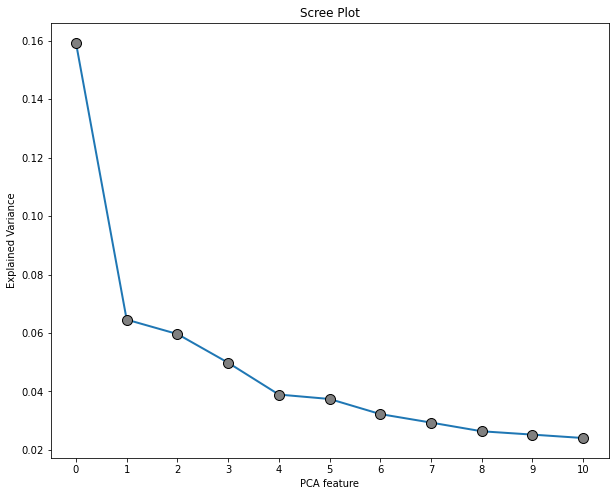

In [24]:

# INSTANTIATING a PCA object with no limit to principal components
pca_3 = PCA(n_components = 11,
          random_state = 219)


# FITTING and TRANSFORMING the Survey_scaled
survey_pca_3 = pca_3.fit(personality_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_3)


Our team decided to choose 11 components.

In [25]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings.set_index(personality_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
#factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(personality_scaled.columns)



<ipython-input-25-f14e3d697982>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


In [26]:
# converting placeholder_lst into a DataFrame 
factor_df = pd.DataFrame(factor_loadings_3 )

In [27]:
factor_loadings_3 = factor_loadings_3.iloc[: , 0:11]

In [28]:
factor_loadings_3

,0,1,2,3,4,5,6,7,8,9,10
log_Am the life of the party,-0.026990,0.213926,0.164310,-0.175846,-0.071086,0.061599,-0.035910,0.012057,0.037605,-0.037693,-0.152379
log_Feel little concern for others,0.111158,0.056557,0.050102,0.052290,0.145858,0.056787,0.025669,-0.135835,-0.057865,0.145188,-0.213918
log_Am always prepared,-0.084723,-0.007801,0.077692,0.138729,-0.067269,0.068194,-0.184492,-0.061707,-0.133266,-0.085045,-0.141395
log_Get stressed out easily,0.015540,0.242299,-0.137371,0.015783,-0.191016,-0.143299,0.116483,0.165887,-0.026023,-0.007592,0.117956
log_Have a rich vocabulary,-0.103624,-0.002209,0.090775,0.092898,0.023530,-0.053353,-0.217567,0.174131,0.169891,-0.041275,-0.089133
log_Dont talk a lot,0.073508,-0.073814,-0.188496,0.094418,0.111869,0.214554,0.094580,-0.053380,-0.018579,-0.140415,-0.000984
log_Am interested in people,-0.076289,0.010336,-0.023593,-0.268754,0.083217,-0.070204,-0.026275,0.199330,-0.157537,-0.026213,-0.117855
log_Leave my belongings around,0.087696,0.106441,0.026284,-0.137582,0.229479,0.110096,0.015366,0.089710,-0.354291,-0.124315,-0.018385
log_Am relaxed most of the time,-0.003900,-0.091297,0.074778,-0.063305,0.200580,0.232863,-0.166615,0.029620,-0.071366,0.074184,-0.144110
log_Have difficulty understanding abstract ideas,0.089367,0.084104,-0.097807,-0.203409,-0.242445,0.059845,0.073928,-0.073260,0.066255,-0.006222,-0.091275


In [29]:
# naming each principal component
factor_loadings_3.columns = ['Introvert',                
                              'Neurotic_Extroverts',          
                              'Extroverts', 
                              'Openess_Analytical',            
                              'Extrovert_Openess_Creativity',                     
                              'No_Neuroticism',
                              'Polite_NarrowMind',
                              'Scientist',
                              'Agreeableness',
                              'Careless',
                              'Narcisist'] 


# checking the result
factor_loadings_3

,Introvert,Neurotic_Extroverts,Extroverts,Openess_Analytical,Extrovert_Openess_Creativity,No_Neuroticism,Polite_NarrowMind,Scientist,Agreeableness,Careless,Narcisist
log_Am the life of the party,-0.026990,0.213926,0.164310,-0.175846,-0.071086,0.061599,-0.035910,0.012057,0.037605,-0.037693,-0.152379
log_Feel little concern for others,0.111158,0.056557,0.050102,0.052290,0.145858,0.056787,0.025669,-0.135835,-0.057865,0.145188,-0.213918
log_Am always prepared,-0.084723,-0.007801,0.077692,0.138729,-0.067269,0.068194,-0.184492,-0.061707,-0.133266,-0.085045,-0.141395
log_Get stressed out easily,0.015540,0.242299,-0.137371,0.015783,-0.191016,-0.143299,0.116483,0.165887,-0.026023,-0.007592,0.117956
log_Have a rich vocabulary,-0.103624,-0.002209,0.090775,0.092898,0.023530,-0.053353,-0.217567,0.174131,0.169891,-0.041275,-0.089133
log_Dont talk a lot,0.073508,-0.073814,-0.188496,0.094418,0.111869,0.214554,0.094580,-0.053380,-0.018579,-0.140415,-0.000984
log_Am interested in people,-0.076289,0.010336,-0.023593,-0.268754,0.083217,-0.070204,-0.026275,0.199330,-0.157537,-0.026213,-0.117855
log_Leave my belongings around,0.087696,0.106441,0.026284,-0.137582,0.229479,0.110096,0.015366,0.089710,-0.354291,-0.124315,-0.018385
log_Am relaxed most of the time,-0.003900,-0.091297,0.074778,-0.063305,0.200580,0.232863,-0.166615,0.029620,-0.071366,0.074184,-0.144110
log_Have difficulty understanding abstract ideas,0.089367,0.084104,-0.097807,-0.203409,-0.242445,0.059845,0.073928,-0.073260,0.066255,-0.006222,-0.091275


In [30]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(personality_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_3.columns


# checking the results
X_pca_df


,Introvert,Neurotic_Extroverts,Extroverts,Openess_Analytical,Extrovert_Openess_Creativity,No_Neuroticism,Polite_NarrowMind,Scientist,Agreeableness,Careless,Narcisist
0,0.111247,0.544568,-0.327462,0.641213,-1.476934,0.187915,-0.202108,0.262470,0.606245,-0.188929,-0.211616
1,-0.273616,0.872267,-1.560989,1.755445,1.150546,0.893186,0.354275,-2.211041,-0.870514,-1.017586,-0.201394
2,3.820494,-2.732171,4.535191,1.545122,-0.630772,0.973013,-2.315244,-0.296270,0.778067,1.485586,-2.222110
3,-1.154074,2.817092,-2.258922,-2.086074,1.390958,1.908662,0.985800,-1.664189,0.158686,0.280148,-0.939795
4,5.331814,2.445219,0.478482,-0.315548,-0.574547,0.942533,-2.008036,-0.260762,0.321719,-0.546866,0.392314
5,4.522126,1.607655,-2.418711,-0.273934,-0.414820,-1.515397,-0.811398,1.168372,0.847674,-0.865372,1.083351
6,0.788756,2.203558,-1.632329,0.644254,0.487363,-0.541211,0.980392,0.765451,-0.703109,0.401031,0.188883
7,-2.155638,-1.639834,2.052533,-0.741861,-0.433348,-0.678176,-1.065677,1.206237,-0.035911,0.530691,0.402826
8,1.464692,-0.820453,-0.973205,0.515605,-0.674871,0.802315,0.168031,-0.199905,1.448108,1.377630,0.763823
9,-4.219588,-1.365789,0.943564,1.556214,-1.097818,-0.718996,0.624028,-0.855371,0.285491,-1.164243,-0.491840


In [31]:
X_pca_df.to_excel('PCA Factor Loadings.xlsx',
                  index = False)

### Variance 

In [32]:
# checking variance amongst clusters
np.var(X_pca_df)

Introvert                       11.311203
Neurotic_Extroverts              4.583865
Extroverts                       4.234095
Openess_Analytical               3.536931
Extrovert_Openess_Creativity     2.763779
No_Neuroticism                   2.656199
Polite_NarrowMind                2.289463
Scientist                        2.082982
Agreeableness                    1.871662
Careless                         1.790656
Narcisist                        1.707610
dtype: float64

In [33]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Introvert',                 
                              'Neurotic_Extroverts',          
                              'Extroverts', 
                              'Openess_Analytical',            
                              'Extrovert_Openess_Creativity',                     
                              'No_Neuroticism',
                              'Polite_NarrowMind',
                              'Scientist',
                              'Agreeableness',
                              'Careless',
                              'Narcisist'] 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Introvert                       11.311203
Neurotic_Extroverts              4.583865
Extroverts                       4.234095
Openess_Analytical               3.536931
Extrovert_Openess_Creativity     2.763779
No_Neuroticism                   2.656199
Polite_NarrowMind                2.289463
Scientist                        2.082982
Agreeableness                    1.871662
Careless                         1.790656
Narcisist                        1.707610
dtype: float64 


Introvert                       1.0
Neurotic_Extroverts             1.0
Extroverts                      1.0
Openess_Analytical              1.0
Extrovert_Openess_Creativity    1.0
No_Neuroticism                  1.0
Polite_NarrowMind               1.0
Scientist                       1.0
Agreeableness                   1.0
Careless                        1.0
Narcisist                       1.0
dtype: float64


<ipython-input-33-e78db05604f7>:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-33-e78db05604f7>:33: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster         import  KMeans 

## Cluster identification


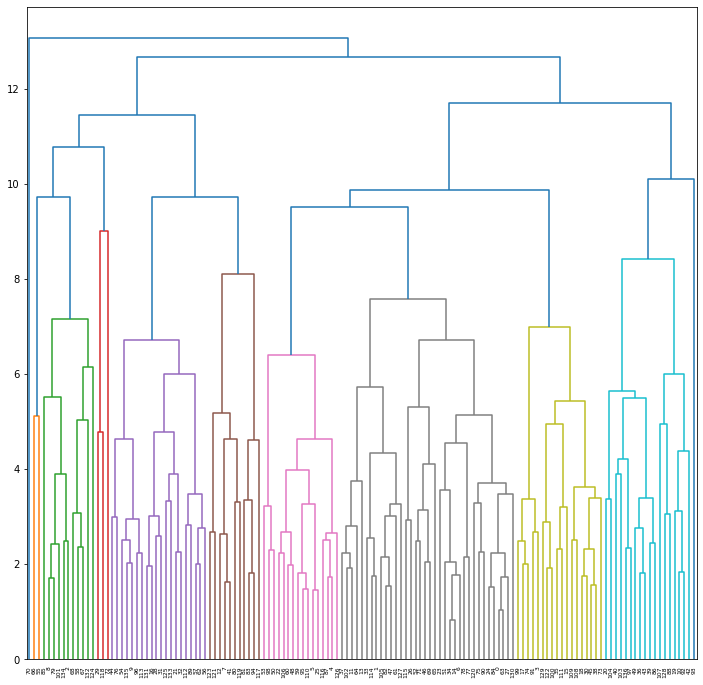

In [35]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

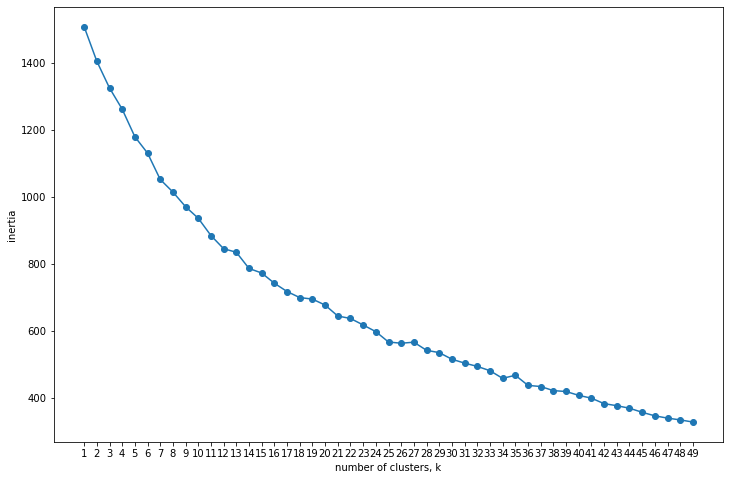

In [36]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

## K Means

In [37]:
# INSTANTIATING a k-Means object with clusters
survey_k_pca = KMeans(n_clusters   = 8,
                         random_state = 219)


# fitting the object to the data
survey_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(survey_kmeans_pca.iloc[: , 0].value_counts())

6    36
3    30
0    26
7    16
1    16
2    11
5     1
4     1
Name: Cluster, dtype: int64


The Data Team decided to keep with 8 clusters for the final analysis.

## Clusters Classification

In [38]:
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Introvert',                 
                              'Neurotic_Extroverts',          
                              'Extroverts', 
                              'Openess_Analytical',            
                              'Extrovert_Openess_Creativity',                   
                              'No_Neuroticism',
                              'Polite_NarrowMind',
                              'Scientist',
                              'Agreeableness',
                              'Careless',
                              'Narcisist']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Introvert,Neurotic_Extroverts,Extroverts,Openess_Analytical,Extrovert_Openess_Creativity,No_Neuroticism,Polite_NarrowMind,Scientist,Agreeableness,Careless,Narcisist
0,1.00,0.52,0.67,-0.16,-0.08,0.55,-0.48,-0.07,0.02,-0.00,-0.22
1,-0.20,-0.22,-0.70,-0.34,-0.21,0.17,0.20,-0.49,-0.19,0.87,1.33
2,-0.18,0.29,-0.27,1.65,0.18,0.24,0.45,-0.40,0.55,0.69,-1.01
3,-0.52,-0.61,0.08,-0.42,-0.59,0.01,0.09,-0.41,0.15,-0.08,-0.34
4,-0.49,-0.04,2.47,0.73,-1.28,4.88,5.90,3.85,-1.42,-0.48,0.78
5,1.65,0.74,-1.81,-2.86,2.86,-1.90,4.24,1.53,1.73,1.31,-2.09
6,0.12,0.01,-0.66,0.31,0.29,-0.27,-0.08,0.33,-0.11,-0.91,0.16
7,-0.68,0.25,1.09,-0.31,0.57,-0.83,-0.34,0.57,-0.27,0.81,0.09


In [39]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([survey_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , ['Laptop_have','Laptop_will_buy', 'Program_in', 'Age', 
                                            'Gender', 'Nationality', 'Ethnicity']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Laptop_have','Laptop_will_buy', 'Program_in', 'Age', 
                                            'Gender', 'Nationality', 'Ethnicity','cluster','Introvert',                 # No Vegan, No Vege, No Indian
                              'Neurotic_Extroverts',          
                              'Extroverts', 
                              'Openess_Analytical',            
                              'Extrovert_Openess_Creativity',                   
                              'No_Neuroticism',
                              'Polite_NarrowMind',
                              'Scientist',
                              'Agreeableness',
                              'Careless',
                              'Narcisist']


# checking the results
final_pca_clust_df.head(n = 5)

,Laptop_have,Laptop_will_buy,Program_in,Age,Gender,Nationality,Ethnicity,cluster,Introvert,Neurotic_Extroverts,Extroverts,Openess_Analytical,Extrovert_Openess_Creativity,No_Neuroticism,Polite_NarrowMind,Scientist,Agreeableness,Careless,Narcisist
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,3,0.111247,0.544568,-0.327462,0.641213,-1.476934,0.187915,-0.202108,0.262470,0.606245,-0.188929,-0.211616
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,6,-0.273616,0.872267,-1.560989,1.755445,1.150546,0.893186,0.354275,-2.211041,-0.870514,-1.017586,-0.201394
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,0,3.820494,-2.732171,4.535191,1.545122,-0.630772,0.973013,-2.315244,-0.296270,0.778067,1.485586,-2.222110
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,3,-1.154074,2.817092,-2.258922,-2.086074,1.390958,1.908662,0.985800,-1.664189,0.158686,0.280148,-0.939795
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,0,5.331814,2.445219,0.478482,-0.315548,-0.574547,0.942533,-2.008036,-0.260762,0.321719,-0.546866,0.392314


In [40]:


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6',
                 6 : 'Cluster 7',
                 7 : 'Cluster 8',
                }


final_pca_clust_df['cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df


,Laptop_have,Laptop_will_buy,Program_in,Age,Gender,Nationality,Ethnicity,cluster,Introvert,Neurotic_Extroverts,Extroverts,Openess_Analytical,Extrovert_Openess_Creativity,No_Neuroticism,Polite_NarrowMind,Scientist,Agreeableness,Careless,Narcisist
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,Cluster 4,0.111247,0.544568,-0.327462,0.641213,-1.476934,0.187915,-0.202108,0.262470,0.606245,-0.188929,-0.211616
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,Cluster 7,-0.273616,0.872267,-1.560989,1.755445,1.150546,0.893186,0.354275,-2.211041,-0.870514,-1.017586,-0.201394
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Cluster 1,3.820494,-2.732171,4.535191,1.545122,-0.630772,0.973013,-2.315244,-0.296270,0.778067,1.485586,-2.222110
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,Cluster 4,-1.154074,2.817092,-2.258922,-2.086074,1.390958,1.908662,0.985800,-1.664189,0.158686,0.280148,-0.939795
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,Cluster 1,5.331814,2.445219,0.478482,-0.315548,-0.574547,0.942533,-2.008036,-0.260762,0.321719,-0.546866,0.392314
5,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Cluster 7,4.522126,1.607655,-2.418711,-0.273934,-0.414820,-1.515397,-0.811398,1.168372,0.847674,-0.865372,1.083351
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,Cluster 7,0.788756,2.203558,-1.632329,0.644254,0.487363,-0.541211,0.980392,0.765451,-0.703109,0.401031,0.188883
7,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,Cluster 8,-2.155638,-1.639834,2.052533,-0.741861,-0.433348,-0.678176,-1.065677,1.206237,-0.035911,0.530691,0.402826
8,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,Cluster 2,1.464692,-0.820453,-0.973205,0.515605,-0.674871,0.802315,0.168031,-0.199905,1.448108,1.377630,0.763823
9,Windows laptop,Chromebook,DD (MBA & Business Analytics),31,Male,Costarrican,Hispanic / Latino,Cluster 4,-4.219588,-1.365789,0.943564,1.556214,-1.097818,-0.718996,0.624028,-0.855371,0.285491,-1.164243,-0.491840


In [41]:
data_df['cluster'].value_counts()

Cluster 7    36
Cluster 4    30
Cluster 1    26
Cluster 8    16
Cluster 2    16
Cluster 3    11
Cluster 6     1
Cluster 5     1
Name: cluster, dtype: int64

In [42]:
data_df['Program_in'].value_counts()

DD (MIB & Business Analytics)       66
One year Business Analytics         36
DD (MBA & Business Analytics)       34
DD (MBA & Disruptive innovation)     1
Name: Program_in, dtype: int64

In [43]:
data_df['Age'].median()

26.0

In [44]:
data_df['Gender'].value_counts()

Male      78
Female    59
Name: Gender, dtype: int64

In [45]:
data_df['Ethnicity'].value_counts()

White / Caucasian       38
Far east Asian          29
Hispanic / Latino       25
West Asian / Indian     25
Prefer not to answer     9
African American         8
Middle Eastern           2
Native American          1
Name: Ethnicity, dtype: int64

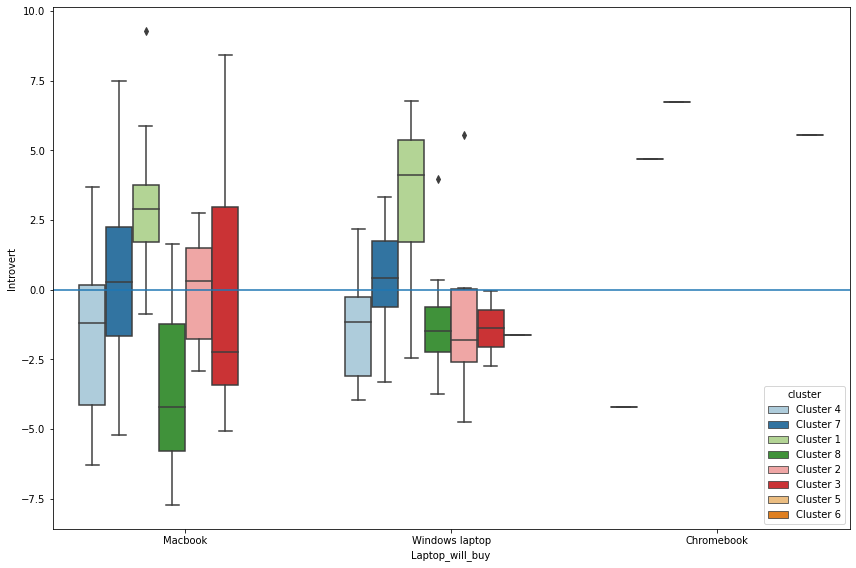

In [46]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'Introvert',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()

In this graph, we can see that extroverts have a preference for Apple computers, while Introverts prefer Windows.

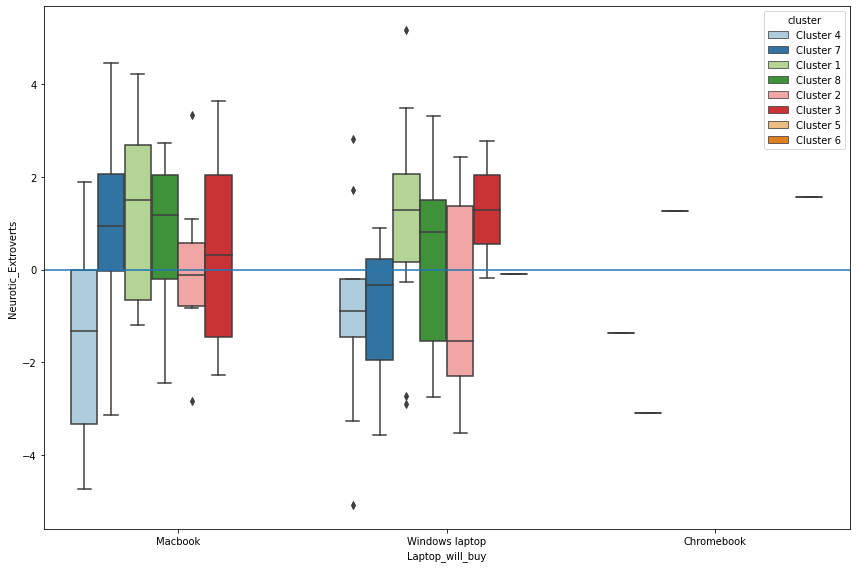

In [47]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'Neurotic_Extroverts',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()

In this graph, we conclude our findings that Nuerotic Extroverts have preferences for Window computers while Introverts are more into Apple computers.

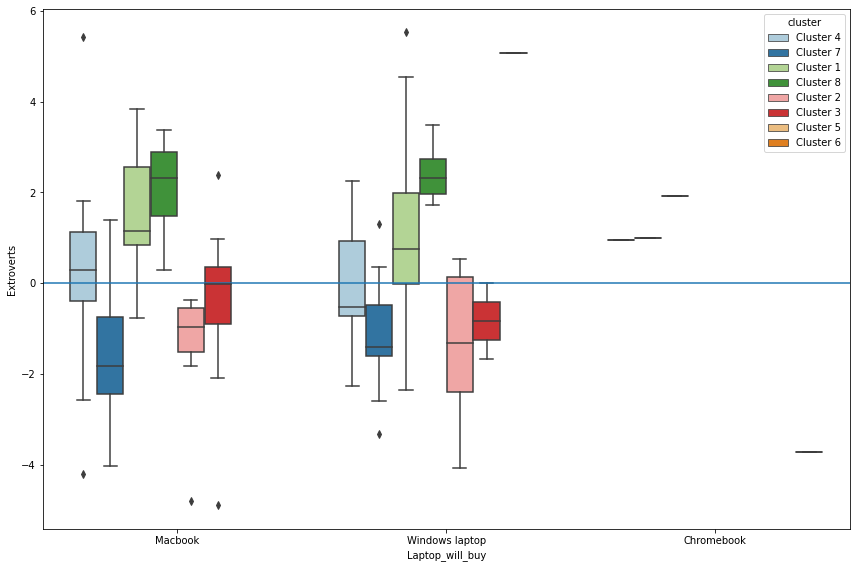

In [48]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 8))
g =sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'Extroverts',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()


Extroverts : very high in Extraversion, Openess to Experience, and Agreeableness. Very positive people, feel comfortable being around people. At the same time, they are open to new ideas and can solve multiple tasks.


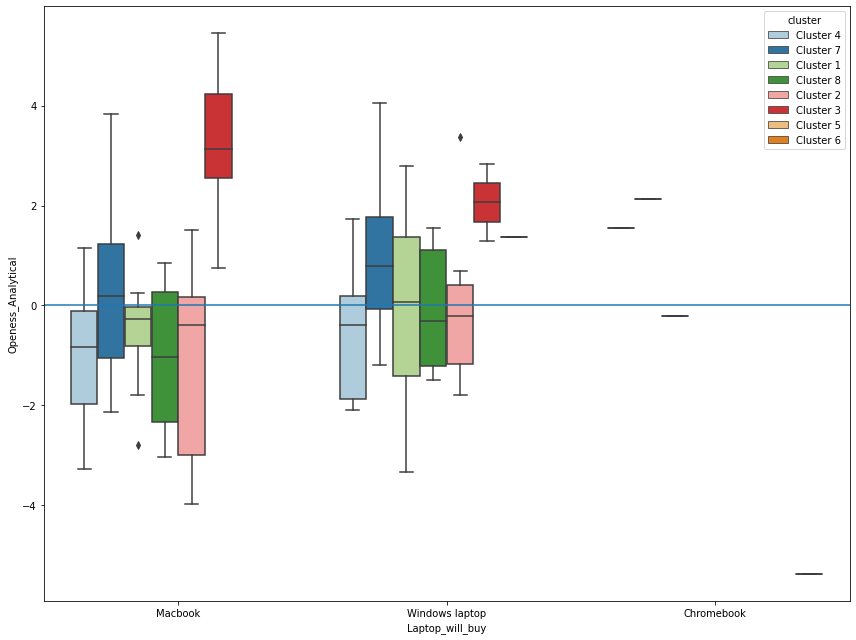

In [49]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 9))
g =sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'Openess_Analytical',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()

People classified as Openess Analytical have a preference for Windows computers.


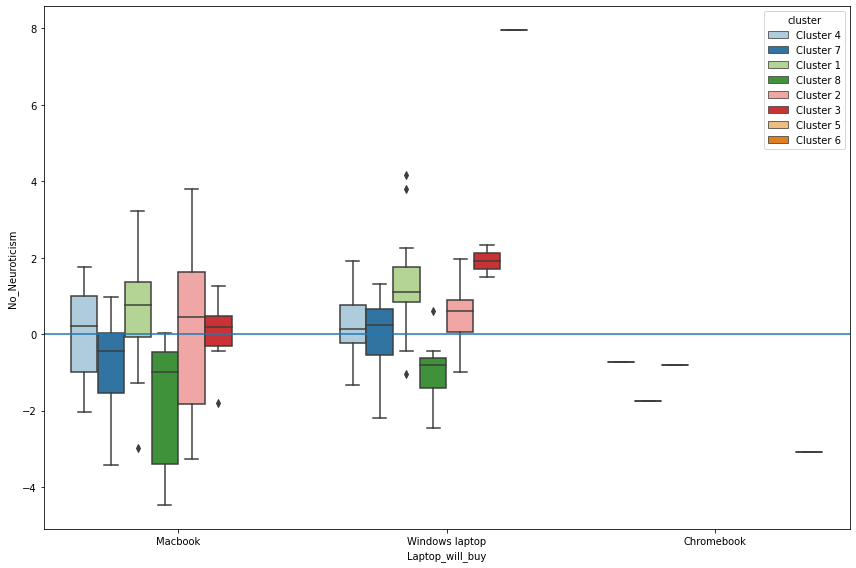

In [50]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 8))
g =sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'No_Neuroticism',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()

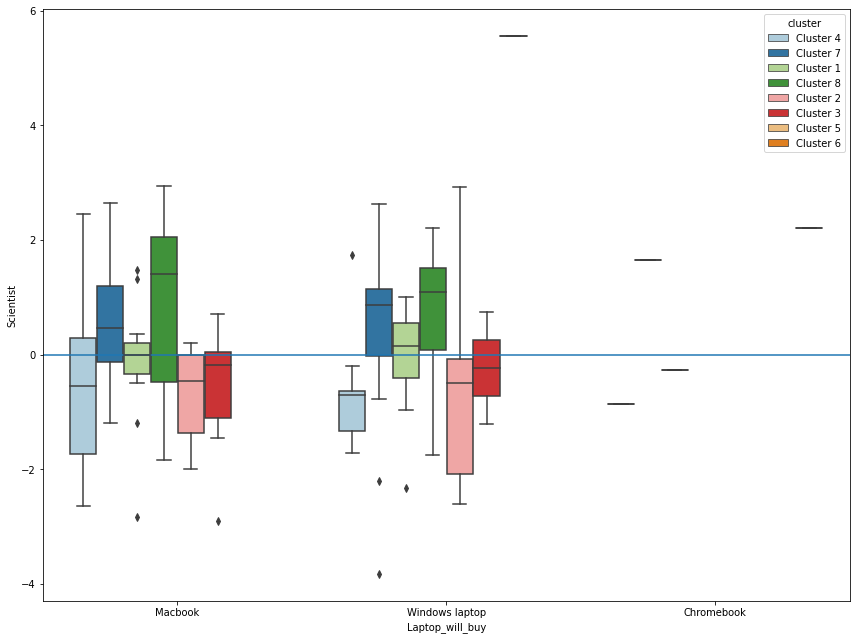

In [51]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 9))
g =sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'Scientist',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()

Scientist also have preference for Windows computers.


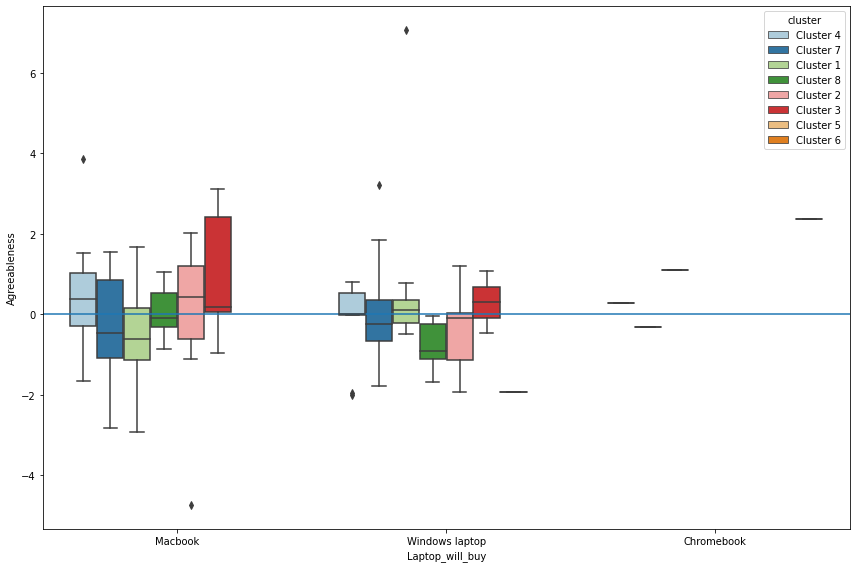

In [52]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 8))
g =sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'Agreeableness',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()

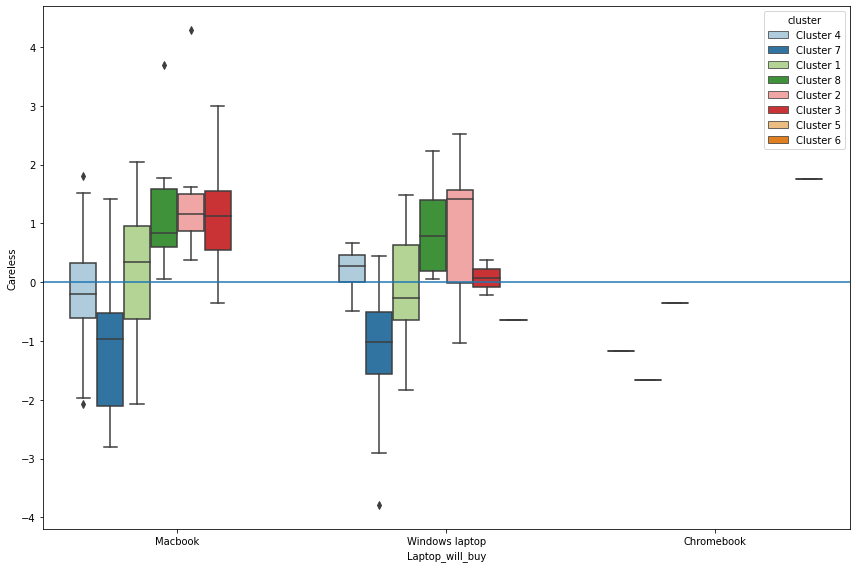

In [53]:
#############################
# Williness to buy a Laptop 
#############################
fig, ax = plt.subplots(figsize = (12, 8))
g =sns.boxplot(x    = 'Laptop_will_buy',
            y    = 'Careless',
            hue  = 'cluster',
            palette = "Paired",
            data = data_df)

ax.axhline(0, 1, 0)

#formatting and displaying the plot
plt.tight_layout()
plt.show()

# Insights and Recommendations

 
<u>Insight 1</u>
<br>Based on our findings, the group classified as Extroverts prefer Apple as they tend to be more brand-driven and relates to Apple as a status symbol. Also, the trait gets passed on with apple users -' once an apple user always an apple user. It could also be a major driving force for buying decisions and they are more likely to buy a Mac due to familiarity and brand loyalty.</br>

<u>Insight 2</u>
<br>Based on our findings, the program that prefers Mac over Windows is DD (MIB & Business Analytics). As a MAC is quite preferred by creative users for its software offerings. It turns out that it would be reliable for students with both their courses. Students can get an assurance of the usability and durability of a Mac. As Apple also offers a student discount it draws furthermore student buyers.</br>

<u>Insight 3</u>
<br>Based on the analysis, People with ease personality traits and analytical skills, tend not to opt for Apple computers. People like Scientists, mathematicians, physicists need to work on many different platforms, servers concurrently which is a tedious task to do with ios. Apple faces a major drawback incompatibility with a lot of applications which is provided as an alternative solution to customers, Apple can capture the market-disrupting the market with their best product.</br>


<u>Recommendations</u>
<br>A majority of people tend to prefer Mac over Windows due to its brand recognition, make, and durability of the Mac. Therefore, Apple(Mac) should consider focusing on the students, especially as they make up for a large number of the population globally. Apple can also target personalities of the "Extrovert_Openess_Creativity" and the "Extrovert" groups, who value design, the long life of the product, and its friendly-user system. It is also recommended that the company look for ways to emphasize the machine's processing capacity for more systematic activities to gain market share. Apple should start giving some offers to the target groups, it will enhance their reachability to a wider consumer population. Apple can also consider customization options for the people who are from creative professions/backgrounds as they may need compatibility with some other graphics, etc.</br>


<u>Reference</u>
<br>The Influence of Personality Traits on Consumer Impulsive Buying Behaviour,November 18, 2019, https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3482230#:~:text=The%20personality%20of%20individuals%20is,always%20influenced%20by%20their%20personality.</br>
